In [1]:
import pandas as pd
import datetime
from tqdm.notebook import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

register_matplotlib_converters()
plt.style.use('fivethirtyeight')

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9 #Changes default matplotlib plots to this size

In [25]:
with open('./data.txt') as file:
    dump = file.read()

In [26]:
timestamp = []
energy_consumption = []
raw_data = dump.split(',')

for row in tqdm(raw_data):
    row = row.strip().split('=')
    try:
        tstamp = datetime.datetime.fromtimestamp(
            int(row[0])/1000
        ).strftime('%Y-%m-%d %H:%M:%S')
        ecmp = float(row[1])
        energy_consumption.append(ecmp)
        timestamp.append(tstamp)
    except:
        pass

data  = pd.DataFrame({
    'Timestamp':timestamp,
    'Energy_consumption': energy_consumption,
})

data.set_index('Timestamp',inplace=True)
data.index = pd.to_datetime(data.index, format='%Y-%m-%d %H:%M:%S')
data

,Energy_consumption
Timestamp,
2013-05-30 17:15:00,20641.958202
2013-05-30 17:30:00,18606.632254
2013-05-30 17:45:00,18245.758858
2013-05-30 18:00:00,17110.210575
2013-05-30 18:15:00,16114.200004
...,...
2017-10-04 04:00:00,4436.336938
2017-10-04 04:15:00,7077.930190
2017-10-04 04:30:00,5345.737893


In [38]:
len(raw_data)

126370

In [85]:
raw_data = pd.read_csv('./data.csv')
timestamp = []

for row in tqdm(raw_data.Timestamp.tolist()):
    try:
        tstamp = datetime.datetime.fromtimestamp(
            int(row)/1000
        ).strftime('%Y-%m-%d %H:%M:%S')
        timestamp.append(tstamp)
    except:
        print(row)
    
raw_data['Timestamp'] = timestamp
data=raw_data
data.set_index('Timestamp',inplace=True)
data.index = pd.to_datetime(data.index, format='%Y-%m-%d %H:%M:%S')
data

,energy_consumption
Timestamp,
2014-07-24 20:30:00,499.247996
2014-07-24 20:45:00,530.257188
2014-07-24 21:00:00,477.541561
2014-07-24 21:15:00,463.587425
2014-07-24 21:30:00,395.367202
...,...
2016-05-27 03:15:00,1821.790047
2016-05-27 03:30:00,1581.468807
2016-05-27 03:45:00,784.532565


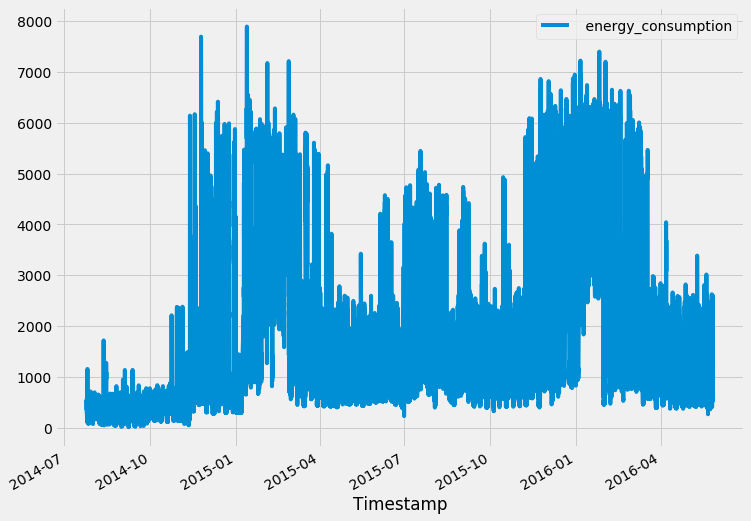

In [86]:
data.plot()

In [87]:
data.index

DatetimeIndex(['2014-07-24 20:30:00', '2014-07-24 20:45:00',
               '2014-07-24 21:00:00', '2014-07-24 21:15:00',
               '2014-07-24 21:30:00', '2014-07-24 21:45:00',
               '2014-07-24 22:00:00', '2014-07-24 22:15:00',
               '2014-07-24 22:30:00', '2014-07-24 22:45:00',
               ...
               '2016-05-27 02:00:00', '2016-05-27 02:15:00',
               '2016-05-27 02:30:00', '2016-05-27 02:45:00',
               '2016-05-27 03:00:00', '2016-05-27 03:15:00',
               '2016-05-27 03:30:00', '2016-05-27 03:45:00',
               '2016-05-27 04:00:00', '2016-05-27 04:15:00'],
              dtype='datetime64[ns]', name='Timestamp', length=53761, freq=None)

In [88]:
data.describe()

,energy_consumption
count,53761.000000
mean,1652.662030
std,1537.075976
min,7.752298
25%,570.569138
50%,942.679445
75%,2173.744379
max,7893.389896


In [89]:
daily_data = data.resample(rule='D').sum()

# Set frequency explicitly to D
daily_data = daily_data.asfreq('D')
daily_data.head(10)


,energy_consumption
Timestamp,
2014-07-24,6404.948666
2014-07-25,38516.517737
2014-07-26,23870.876221
2014-07-27,17589.964324
2014-07-28,25945.391185
2014-07-29,37876.177917
2014-07-30,38110.297318
2014-07-31,43135.336928
2014-08-01,47146.375950


In [93]:
daily_data.columns

Index([' energy_consumption'], dtype='object')

(array([192., 115., 157.,  61.,  48.,  23.,  21.,  22.,  29.,   6.]),
 array([     0.        ,  49778.59123743,  99557.18247486, 149335.77371229,
        199114.36494973, 248892.95618716, 298671.54742459, 348450.13866202,
        398228.72989945, 448007.32113688, 497785.91237432]),
 <a list of 10 Patch objects>)

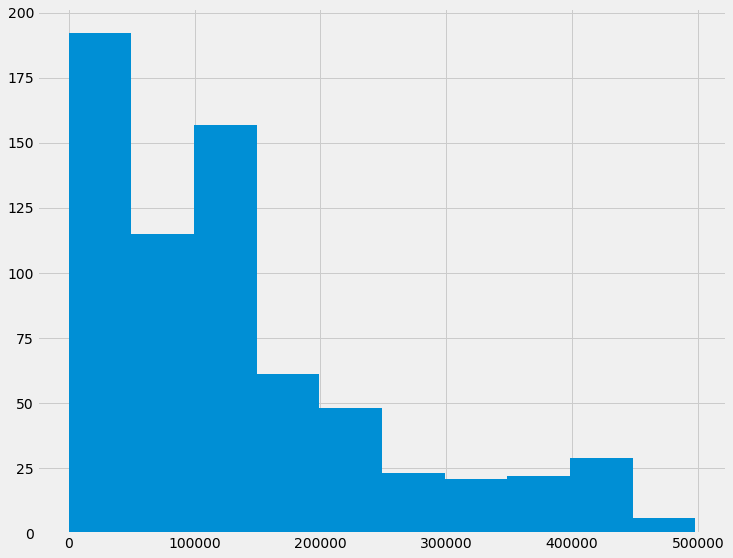

In [94]:
plt.hist(daily_data[' energy_consumption'])

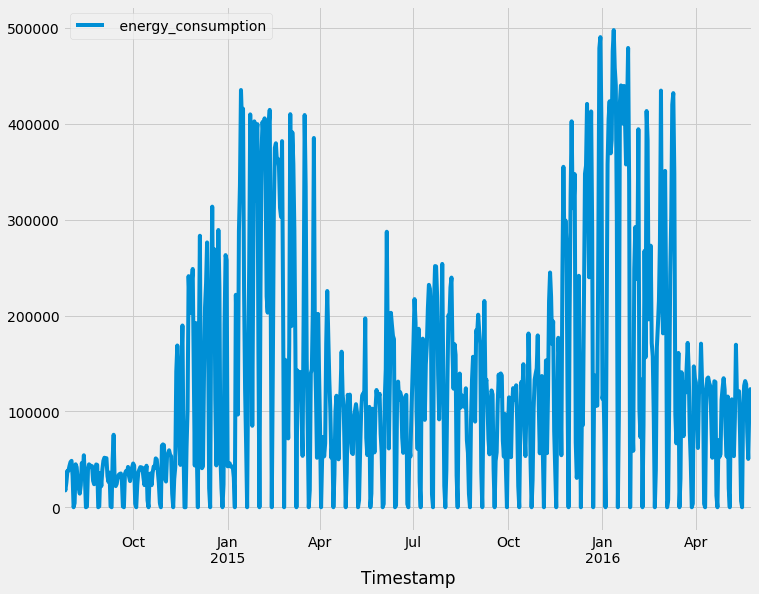

In [95]:
daily_data = daily_data.drop([daily_data.index.min(), daily_data.index.max()])
daily_data.plot()

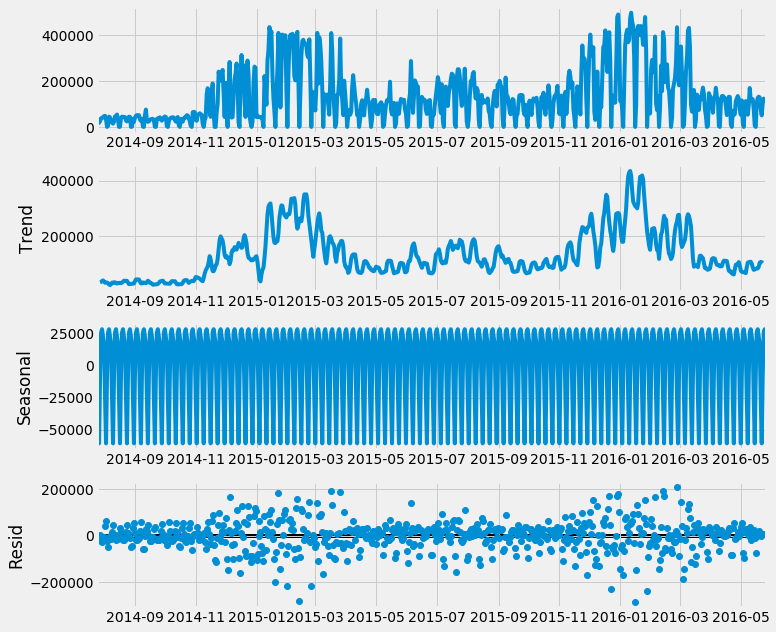

In [96]:
decomposition = seasonal_decompose(daily_data, model='additive')

fig = decomposition.plot()
plt.show()

/Users/siddesh.suseela/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


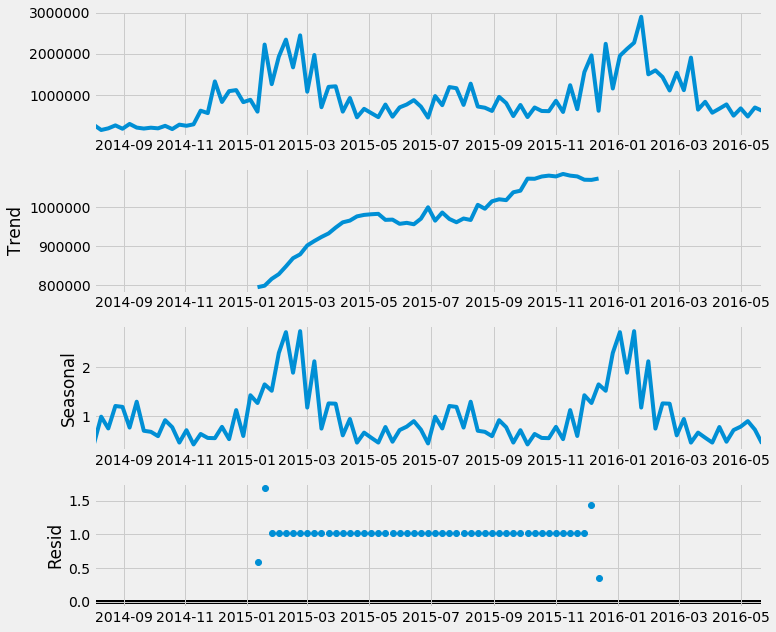

In [97]:
weekly_data = data.resample(rule='W').sum()
weekly_data = weekly_data.drop([weekly_data.index.min(), weekly_data.index.max()])

decomposition = seasonal_decompose(weekly_data,model='multiplicative', freq=47) # Aggregate to weekly level

fig = decomposition.plot()
plt.show()

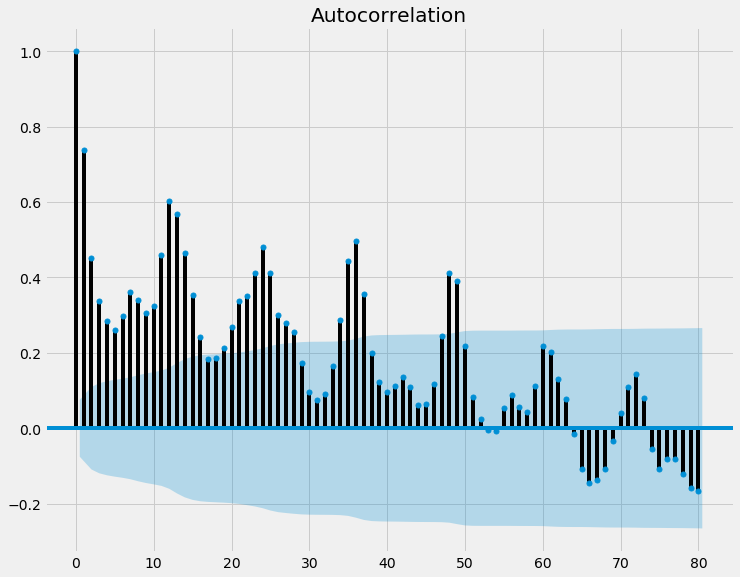

In [100]:
plot_acf(daily_data[' energy_consumption'],lags=80) #alpha 1 suppresses CI

plt.show()

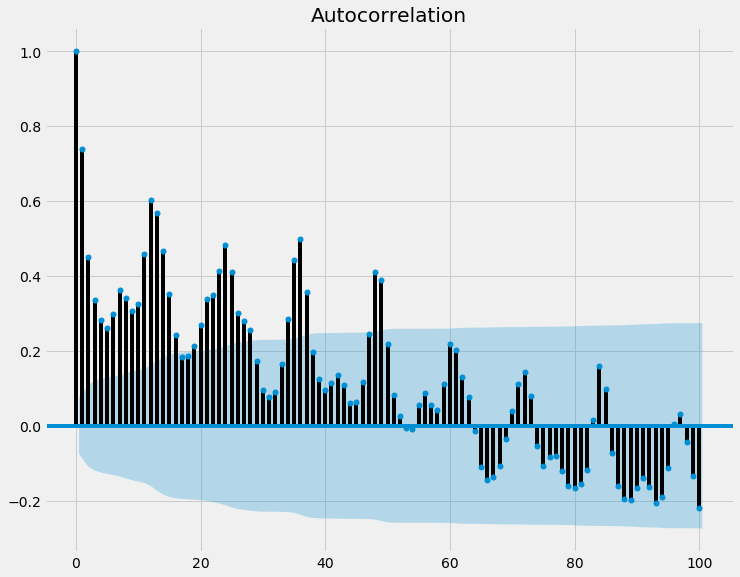

In [102]:
plot_acf(daily_data[' energy_consumption'],lags=100) #alpha 1 suppresses CI

plt.show()